In [1]:
#!pip install -q keras
#!pip install -U tensorflow
#!pip install -U tensorflow-gpu==1.15
# Ensure that the latest TensorFlow version is installed.
#!pip install -q tf-nightly-gpu-2.0-preview
# Load the TensorBoard notebook extension.
%load_ext tensorboard
%tensorflow_version 2.x      
!pip install -U tensorflow-gpu    
!pip show tensorflow

TensorFlow 2.x selected.
     |████████████████████████████████| 421.8MB 35kB/s 
ERROR: tensorflow-addons 0.6.0 has requirement tensorflow-gpu==2.0.0, but you'll have tensorflow-gpu 2.1.0 which is incompatible.
Name: tensorflow
Version: 2.1.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /tensorflow-2.1.0/python3.6
Requires: keras-applications, gast, protobuf, tensorflow-estimator, google-pasta, grpcio, astor, absl-py, tensorboard, wheel, opt-einsum, keras-preprocessing, wrapt, numpy, scipy, six, termcolor
Required-by: tensorflow-federated, stable-baselines, magenta, fancyimpute


In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd drive/My\ Drive/TFG/NN/Multispectral

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
/content/drive/My Drive/TFG/NN/Multispectral


In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [0]:
import keras

Using TensorFlow backend.


damaged
img_array:  (128, 128) uint8


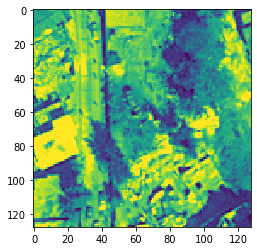

undamaged
img_array:  (128, 128) uint8


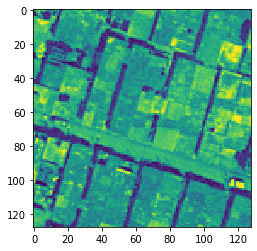

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
categories=["damaged", "undamaged"]
for category in categories:
  path=os.path.join('.',category)
  for img in os.listdir(path):
    print(category)
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    print('img_array: ',img_array.shape,img_array.dtype)
    plt.imshow(img_array)
    plt.show()
    break

In [0]:
training_data=[]
def create_training_data():
  for category in categories:
    path=os.path.join('.',category)
    class_num=categories.index(category) # index as 0 and 1 to damaged and undamaged
    for img in os.listdir(path):
      img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      new_array= cv2.resize(img_array,(128,128))
      training_data.append([new_array,class_num])   
create_training_data()

In [0]:
print(len(training_data))
import random
#random.shuffle(training_data)

(2,)
268


In [0]:
for sample in training_data:
  print(sample[1])
  
print(len(sample))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2


In [0]:
from sklearn.model_selection import train_test_split
x=[]
y=[]
for features, label in training_data:
  x.append(features)
  y.append(label)
x = np.array(x).reshape(-1,128,128,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle= True)
print('x_train:'+str(x_train.shape))
print('y_train:'+str(len(y_train)))
print('x_test:'+str(x_test.shape))
print('y_test:'+str(len(y_test)))

x_train:(201, 128, 128, 1)
y_train:201
x_test:(67, 128, 128, 1)
y_test:67


In [0]:
#Data Argumentation
from keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=15,
                               horizontal_flip=True,
                               vertical_flip=True,
                               data_format='channels_last')
def create_aug_gen(in_gen):
  for in_x,in_y in in_gen:
    g_x = image_gen.flow(x_train,y_train,batch_size=55)
    x,y=next(g_x)
    yield x,y

In [0]:
#Data Argumentation
import random
train_data = []
x_train_arg = []
y_train_arg = []
train_data.append([x_train,y_train])
cur_gen = create_aug_gen(iter(train_data))
t_x,t_y = next(cur_gen)
print('t_x',t_x.shape, t_x.dtype)
print('t_y',t_y.shape, t_y.dtype)
#for x in t_x:
#  plt.imshow(x.reshape(128,128))
#  plt.show()
x_train_arg = np.concatenate((x_train,t_x), axis=0)
y_train_arg = np.concatenate((y_train,t_y), axis=None)
print('x_train', x_train_arg.shape, x_train_arg.dtype)
print('y_train', y_train_arg.shape, y_train_arg.dtype)
#Shuffle data
random.shuffle([x_train_arg,y_train_arg])

t_x (55, 128, 128, 1) float32
t_y (55,) int64
x_train (256, 128, 128, 1) float32
y_train (256,) int64


undamaged


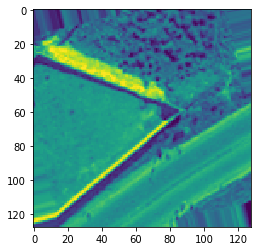

damaged


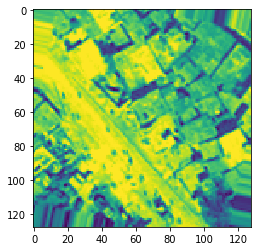

undamaged


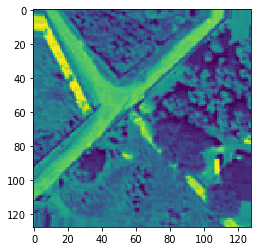

damaged


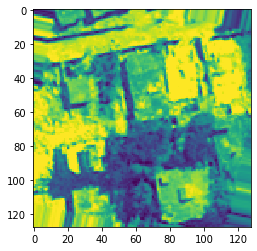

undamaged


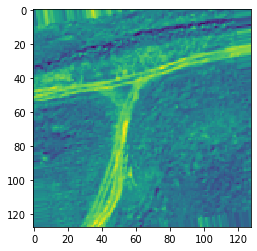

undamaged


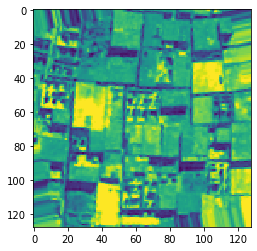

undamaged


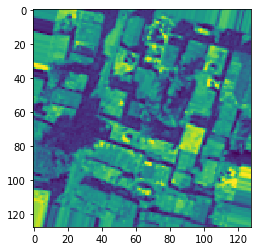

damaged


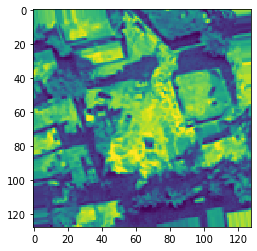

damaged


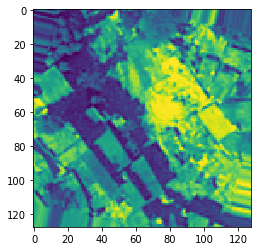

In [0]:
#Images generated by the data argumentation
i = 0
for x in t_x:
  print(categories[t_y[i]])
  plt.imshow(x.reshape(128,128))
  plt.show()
  i = i+1

In [0]:
import pickle
pickle_out=open("x.pickle","wb")
#pickle.dump(x,pickle_out)
pickle.dump(x_train,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
#pickle.dump(y,pickle_out)
pickle.dump(y_train,pickle_out)
pickle_out.close()

In [0]:
# x[1] is feature and y[1] is label

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,SpatialDropout2D, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils as np_utils
import pickle
from keras.preprocessing.image import load_img
import time
import datetime

#x=pickle.load(open("x.pickle","rb"))
#y=pickle.load(open("y.pickle","rb"))
#x_training=x_training/255.0

#x = np.array(x_train).astype(np.float32)/255.0

x = np.array(x_train_arg).astype(np.float32)/255.0
y = np.array(y_train_arg).astype(np.float32)

#y = np.array(y_train).astype(np.float32)
y_testing = np.array(y_test).astype(np.float32)


print('x_train:',x.shape,x.dtype)
print('y_train:',y.shape,y.dtype)
print('x_test:',x_test.shape,x.dtype)
#print('y_test:',y_test.shape,y.dtype)

def create_model(x,name):
  tf.keras.backend.clear_session()

  inputs = Input(x.shape[1:])

  #Layer 1
  layer = Conv2D(64,(3,3),activation='relu')(inputs)
  layer = MaxPooling2D(pool_size=(3,3))(layer)
  layer = Dropout(0.5)(layer)

  #Layer 2
  layer = Conv2D(64,(3,3),activation='relu')(layer)
  layer = MaxPooling2D(pool_size=(3,3))(layer)
  layer = Dropout(0.5)(layer)

  #Layer 3
  layer = Conv2D(64,(3,3),activation='relu')(layer)
  layer = MaxPooling2D(pool_size=(3,3))(layer)
  layer = Dropout(0.5)(layer)

  #Layer 4
  layer = Conv2D(64,(3,3),activation='relu')(layer)
  #layer = Activation('relu')(layer)

  layer = Flatten()(layer)
  layer = Dense(64)(layer)
  #layer = Activation('relu')(layer)

  output = Dense(1,activation='sigmoid')(layer)
  return Model(inputs=inputs,outputs=output,name=name)



time_saver = datetime.datetime.now().strftime("%d%m%Y-%H%M%S")
#strategy = tf.distribute.MirroredStrategy()
#with strategy.scope():

model = create_model(x,time_saver)
op = Adam(learning_rate=0.0003)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer= op, metrics=['accuracy',tf.keras.metrics.BinaryCrossentropy()])


#Model Summary
model.summary()

end = time.time()

print(time_saver)        

x_train: (256, 128, 128, 1) float32
y_train: (256,) float32
x_test: (67, 128, 128, 1) float32
Model: "04022020-010446"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 42, 42, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_______________________

In [0]:
from tensorflow.keras.callbacks import TensorBoard,ModelCheckpoint
#TensorBoard  
name_file= "128CNN_"+time_saver
filepath = 'models/model/Best_128CNN-'+time_saver+'.h5'
tensorboard = TensorBoard(log_dir='logs/{}'.format(name_file), write_graph=True, write_images=True,
                          histogram_freq=1,profile_batch=3)
#Model Checkpoint (callbacks)
checkpoint = ModelCheckpoint(filepath,verbose=1,monitor='accuracy',save_best_only = True, mode='max')
callbacks_list = [tensorboard,checkpoint]

start = time.time()

history=model.fit(x=x,y=y, batch_size=16,epochs=200,validation_split=0.3,shuffle=True,callbacks=callbacks_list) 

end = time.time()

Train on 179 samples, validate on 77 samples
Epoch 1/200
176/179 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5511 - binary_crossentropy: 0.6915
Epoch 00001: accuracy improved from -inf to 0.54749, saving model to models/model/test/Best_128CNN-04022020-010446.h5
179/179 [==============================] - 1s 6ms/sample - loss: 0.6923 - accuracy: 0.5475 - binary_crossentropy: 0.6923 - val_loss: 0.6895 - val_accuracy: 0.5974 - val_binary_crossentropy: 0.6895
Epoch 2/200
112/179 [=================>............] - ETA: 0s - loss: 0.6924 - accuracy: 0.5446 - binary_crossentropy: 0.6924
Epoch 00002: accuracy improved from 0.54749 to 0.56425, saving model to models/model/test/Best_128CNN-04022020-010446.h5
179/179 [==============================] - 0s 1ms/sample - loss: 0.6896 - accuracy: 0.5642 - binary_crossentropy: 0.6896 - val_loss: 0.6889 - val_accuracy: 0.5974 - val_binary_crossentropy: 0.6889
Epoch 3/200
112/179 [=================>............] - ETA: 0s - los

In [0]:
%tensorboard --logdir 'logs/'

Reusing TensorBoard on port 6006 (pid 1484), started 0:09:00 ago. (Use '!kill 1484' to kill it.)

Time Training: 28.463656187057495
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
Acc Max: 1.0
Loss Min: 0.0035504216742184426


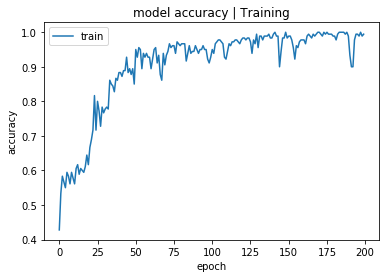

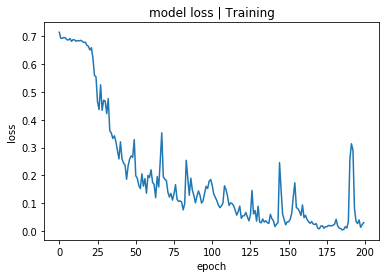

In [0]:
print("Time Training: "+str(end-start))
# list all data in history to plot accuracy
print(history.history.keys())
print('Acc Max:',max(history.history['accuracy']))
print('Loss Min:',min(history.history['loss']))
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy | Training')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss | Training')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
import pickle
pickle_out=open("x_test.pickle","wb")
#pickle.dump(x,pickle_out)
pickle.dump(x_test,pickle_out)
pickle_out.close()

pickle_out=open("y_test.pickle","wb")
#pickle.dump(y,pickle_out)
pickle.dump(y_test,pickle_out)
pickle_out.close()

x_test =pickle.load(open("x_test.pickle","rb"))
y_test =pickle.load(open("y_test.pickle","rb"))
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_test: (54, 128, 128, 1)
y_test: (54,)


In [0]:
y_test = np.array(y_test).astype(np.float64)
history_eval = model.evaluate(x=x_test,y=y_test,batch_size=32,callbacks=callbacks_list)
print(history_eval)

NameError: ignored

In [0]:
#model.save('models/model/128CNN-'+time_saver+'.h5')
model.save_weights('models/weights/128CNN-'+time_saver+'.h5')

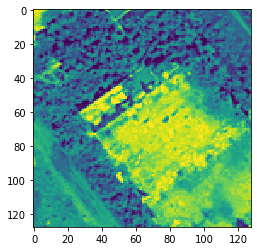

damaged
[[0.2599272]]


In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
categories=["damaged","undamaged"] #Testing code
def prepare(filename):
  img_array=cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
  plt.imshow(img_array)
  plt.show()
  new_array=cv2.resize(img_array,(128,128))
  return new_array.reshape(-1,128,128,1)/255.0
model_save=tf.keras.models.load_model('models/model/128CNN-28122019-164023-FP16.h5')
#model_save.load_weights('models/weights/128CNN-21102019-160139.h5')

img = 'damaged/post_018_086.png'
prepare_img = prepare(img).astype(np.float32)
prediction=model_save.predict([prepare_img])
predict = 1 if prediction[0][0] >= 0.5 else 0
print (categories[predict])
#print (categories[int(prediction[0])])
print(prediction)
#print(end-start)

In [0]:
#Testing the algorithm with all the data avariable
import os
y_predicted = []
y_true = []
def get_predictions():
  for features, label in training_data:
    #print(features)
    prediction=model_save.predict([np.array(features.reshape(-1,128,128,1)).astype(np.float64)/255.0])
    predict = 1 if prediction[0][0] >=0.5 else 0
    y_predicted.append(predict)
    y_true.append(label)


get_predictions()
y_predicted = np.array(y_predicted).astype(np.int)
y_true = np.array(y_true,np.uint8)

In [0]:
import collections
print('y_predicted:',y_predicted.shape,y_predicted)
print('y_true:',y_true.shape,y_true)
print('Testing the whole dataset:',collections.Counter(y_predicted == y_true))

y_predicted: (268,) [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1]
y_true: (268,) [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [0]:
#Trying with the test data
import collections
y_test_prediction_comp = []
y_test_prediction = []
x_testing = np.array(x_test).astype(np.float64)/255.0
#print('x_test',x_testing.shape,x_testing.dtype,x_testing)
for x in x_testing:
  x= np.array([x])
  #print('x',x.shape,x)
  test_prediction = model_save.predict(x)
  #test_prediction = model.predict(x) #Model already save
  x_image = x.reshape(128,128)
  plt.imshow(x_image)
  plt.show()
  predict_test = 1 if test_prediction[0][0] >= 0.5 else 0
  y_test_prediction.append(test_prediction[0][0])
  y_test_prediction_comp.append(predict_test)
print('y_test_prediction:',y_test_prediction)
print('y_test_true',y_test)
print('Test data:',collections.Counter(y_test_prediction_comp==np.array(y_test)))

Output hidden; open in https://colab.research.google.com to view.

**<h1>3. TUNING THE MODEL</h1>**

In [0]:
!pip install tensorflow-model-analysis
jupyter nbextension enable --py widgetsnbextension
jupyter nbextension install --py --symlink tensorflow_model_analysis
jupyter nbextension enable --py tensorflow_model_analysis

SyntaxError: ignored

In [0]:
import tensorflow as tf
import tensorflow_model_analysis as tfma
model_tuned_path = 'models/model/128CNN-21102019-160139.h5'
estimator = tf.keras.estimator.model_to_estimator(keras_model_path=model_tuned_path)

number = tf.feature_column.numeric_column('number')
x_tuning = tf.feature_column.numeric_column('x')
y_tuning = tf.feature_column.numeric_column('y')
color = tf.feature_column.numeric_column('color')

def eval_input_receiver_fn():
  categories = ['damaged','undamaged']
  serialized_tf_example = tf.compat.v1.placeholder(
      dtype=tf.float32, shape=[None], name='input_tuning_placeholder')

  # This *must* be a dictionary containing a single key 'examples', which
  # points to the input placeholder.
  receiver_tensors = {'examples': serialized_tf_example}

  feature_spec =  tf.feature_column.make_parse_example_spec(
      [number, x_tuning, y_tuning, color])
  features = tf.io.parse_example(serialized_tf_example, feature_spec)

  return tfma.export.EvalInputReceiver(
    features=features,
    receiver_tensors=receiver_tensors,
    labels=categories)
  

tfma.export.export_eval_savedmodel(
  estimator=estimator, export_dir_base='',
  eval_input_receiver_fn=eval_input_receiver_fn)

**<h1>4. FREEZING THE MODEL</h1>**

<h2>4.1. Save the model as TF´s model</h2>

In [0]:
import tensorflow as tf
from tensorflow.keras.models import load_model
#model=tf.keras.models.load_model('models/model/128CNN-21102019-160139.h5')
#model.load_weights('models/weights/128CNN-21102019-160139.h5')
#model.save('models/TF28122019-164023-FP16/',save_format='tf')
tf.keras.experimental.export_saved_model(model, 'models/TF/SM-28122019-164023-FP16/')

AttributeError: ignored

# <h2>4.2. Freeze Model and Export it</h2>

**(Option 1) Using a TensorFlow Estimator**

In [0]:
from tensorflow.compat.v1.estimator.inputs import numpy_input_fn
estimator_model = tf.keras.estimator.model_to_estimator(keras_model=model,model_dir="/models/freeze")
def input_function(feature,labels,shuffle=False):
  input_fn = numpy_input_fn(
      x = {'input node': features},
      y = labels,
      shuffle=shuffle,
      batch_size = 32,
      num_epochs = 200
  )
  return input_fn
estimator_model.train(input_fn=input_function(x,y,True))

**(Option 2) Try to freeze the model**

In [0]:
import tensorflow.compat.v1 as tf
def frozen_graph_maker(export_dir,output_graph):
  with tf.Session(graph=tf.Graph()) as sess:
    tf.saved_model.loader.load(sess, [tf.saved_model.tag_constants.SERVING], export_dir)
    output_nodes = [n.name for n in tf.get_default_graph().as_graph_def().node]
    output_graph_def = tf.graph_util.convert_variables_to_constants(
            sess, # The session is used to retrieve the weights
            sess.graph_def,
            output_nodes# The output node names are used to select the usefull nodes
    )
    output_graph_def = tf.graph_util.remove_training_nodes(output_graph_def)       
    # Finally we serialize and dump the output graph to the filesystem
    with tf.gfile.GFile(output_graph, "wb") as f:
              f.write(output_graph_def.SerializeToString())

export_dir='models/tf'
output_graph = "models/freeze/frozen_graph.pb"
frozen_graph_maker(export_dir,output_graph)

INFO:tensorflow:Restoring parameters from drive/My Drive/TFG/NN/Multispectral/models/tf/variables/variables
INFO:tensorflow:Froze 43 variables.
INFO:tensorflow:Converted 43 variables to const ops.


In [0]:
def freeze_session(session,keep_var_names=None,output_names=None,clear_devices=True):
  from tensorflow.compat.v1.graph_util import convert_variables_to_constants,remove_training_nodes
  graph = session.graph
  with graph.as_default():
    freeze_var_names = list(set(v.op.name for v in tfcompact.global_variables()).difference(keep_var_names or []))
    output_names = output_names or []
    output_names += [v.name for v in tfcompact.global_variables()]
    input_graph_def = graph.as_graph_def()
    if clear_devices:
      for node in input_graph_def.node:
        node_device = ""
    frozen_graph = convert_variables_to_constants(session,input_graph_def,output_names,freeze_var_names)
    frozen_graph = remove_training_nodes(frozen_graph)
    return frozen_graph

In [0]:
import tensorflow.compat.v1 as tfcompact
from tensorflow import keras as keras
import tensorflow as tf
from tensorflow.python.tools import freeze_graph
tf.keras.backend.clear_session()


model=tf.keras.models.load_model('models/model/Best_128CNN-07112019-153540.h5')
model.load_weights('models/weights/128CNN-07112019-153540.h5')

frozen_graph = freeze_session(tfcompact.Session(),
                              output_names=[out.op.name for out in model.outputs])
tf.train.write_graph(frozen_graph,"models/frozen",'Frozen_07112019-153540.pb',as_text=False)

In [0]:
from tensorflow.python.tools import freeze_graph
frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in restored_model.outputs], 
                             clear_devices=True)

tf.train.write_graph(frozen_graph, "/tmp", model_name+".pb", as_text=False)

**(Option 3) Rebuild the model, load the weights saved from another model and then, execute frozen_graph_2.py to get the model frozen**

In [0]:
!pip show tensorflow

Name: tensorflow
Version: 1.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: keras-applications, keras-preprocessing, tensorboard, protobuf, absl-py, termcolor, numpy, opt-einsum, gast, google-pasta, tensorflow-estimator, grpcio, wheel, six, wrapt, astor
Required-by: stable-baselines, magenta, fancyimpute


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,SpatialDropout2D, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization,Input
from tensorflow.keras.optimizers import Adam
def rebuild_model():
  tf.keras.backend.clear_session()

  inputs = Input(shape=(128,128,1))

  #Layer 1
  layer = Conv2D(64,(3,3),activation='relu')(inputs)
  layer = MaxPooling2D(pool_size=(3,3))(layer)
  layer = Dropout(0.5)(layer)

  #Layer 2
  layer = Conv2D(64,(3,3),activation='relu')(layer)
  layer = MaxPooling2D(pool_size=(3,3))(layer)
  layer = Dropout(0.5)(layer)

  #Layer 3
  layer = Conv2D(64,(3,3),activation='relu')(layer)
  layer = MaxPooling2D(pool_size=(3,3))(layer)
  layer = Dropout(0.5)(layer)

  #Layer 4
  layer = Conv2D(64,(3,3),activation='relu')(layer)
  #layer = Activation('relu')(layer)

  layer = Flatten()(layer)
  layer = Dense(64)(layer)
  #layer = Activation('relu')(layer)

  output = Dense(1,activation='sigmoid')(layer)
  return Model(inputs=inputs,outputs=output)

In [0]:
file_model = "21102019-160139"
rebuild_model = rebuild_model()
rebuild_model.load_weights('models/weights/128CNN-'+file_model+'.h5')
#tf.keras.utils.plot_model(rebuild_model,file_model+'.png')
#rebuild_model.save('models/TF/21102019-160139/',save_format='tf')
tf.saved_model.save(rebuild_model,'models/TF/21102019-160139_2/')
#rebuild_model.save(file_model+'.h5')
#!python 'models/freeze/freeze_graph_2.py' --h5 $file_model'.h5' --pb 'models/freeze/'$file_model'.pb'
#!rm $file_model'.h5'

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models/TF/21102019-160139_2/assets


<h4>Watch the output of the graph</h4>

In [0]:
out_names = [node.op.name for node in rebuild_model.outputs]
#freeze_graph.freeze_graph(input_saved_model_dir='models/TF/21102019-160139/',output_node_names=out_names,output_graph=file_model)
print(out_names)

['dense_1/Identity']


**<h1>5. What-If Tool</h1>**

In [0]:
!pip install --upgrade witwidget
!pip install witwidget-gpu

     |████████████████████████████████| 2.2MB 2.8MB/s 
ERROR: tensorflow-serving-api 2.1.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.1.0rc1 which is incompatible.
     |████████████████████████████████| 2.2MB 2.8MB/s 


In [0]:
from PIL import Image
from io import BytesIO
examples=[]
for category in categories:
  path=os.path.join('./subset_images',category)
  class_num=categories.index(category) # index as 0 and 1 to damaged and undamaged
  for img in os.listdir(path):
    example = tf.train.Example()
    with open(os.path.join(path, img), 'rb') as f:
      print(f)
      im = Image.open(f).convert('LA')
      im = im.resize((128,128))
      buf = BytesIO()
      im.save(buf, format= 'PNG')
      im_bytes = buf.getvalue()
      example.features.feature['image/encoded'].bytes_list.value.append(im_bytes)
  examples.append(example)

<_io.BufferedReader name='./subset_images/damaged/post_056_106_DM.png'>
<_io.BufferedReader name='./subset_images/damaged/post_061_096_DM.png'>
<_io.BufferedReader name='./subset_images/damaged/post_062_055_DM.png'>
<_io.BufferedReader name='./subset_images/damaged/post_063_064_DM.png'>
<_io.BufferedReader name='./subset_images/damaged/post_065_061_DM.png'>
<_io.BufferedReader name='./subset_images/undamaged/post_001_122_UDM.png'>
<_io.BufferedReader name='./subset_images/undamaged/post_001_148_UDM.png'>
<_io.BufferedReader name='./subset_images/undamaged/post_003_072_UDM.png'>
<_io.BufferedReader name='./subset_images/undamaged/post_004_116_UDM.png'>
<_io.BufferedReader name='./subset_images/undamaged/post_005_123_UDM.png'>


In [0]:
print(example)

feature {
  key: "image/encoded"
  value {
    bytes_list {
      value: "\211PNG\r\n\032\n\000\000\000\rIHDR\000\000\000\200\000\000\000\200\010\004\000\000\000i7\251@\000\000?\264IDATx\234\225\375i\264\245\327}\036v\376\336\341\314\347\316ukF\025\346\221\030\010\020\244HQ\024)J\244$K\242$\322\222\255\330\212b)\212\322\211\333\313\261\025ww\3548^\035/\273\273\227\273\225\301\216\035\307\216\345(\326`\315\246HI\024%Q\234D\022\004A\000\304\214*\024Ps\335\371\3343\276S\177\330\273\312tw\257t\367\371PX\270\253\206\363\276{\357\377\360<\317\377\331\311z\323r\302\237\323\3079W,\274lK\317O\332\361\tgU\3665\206\326\245\356\363\273\336f\335\013\336\322\266a\323kz\346\016<\342\210\343\366}R\"\261*\325\366\226K\336\346?q\2077\345\336e\331\014\013sKr\265\266\211D\241\221*\355Kuef\216\311e\022\031\3462--{zZ\022\215R\252Q\350h\224r\231J-\323\310PH%R\231B\245\243\220k\244\026\n5R\231Z\245\321 \225\313?\350\323\336\362q\177^\3135O\313\325js/\333W\230\030\350YQ\271b\331\347\354y\306\355\316\270S\256o\

In [0]:
x=[]
y=[]
for features, label in training_data:
  x.append(features)
  y.append(label)
x = np.array(x).reshape(-1,128,128,1)
y = np.array(y)

In [0]:
from witwidget.notebook.visualization import WitConfigBuilder
from witwidget.notebook.visualization import WitWidget
from tensorflow.compat.v2.keras.estimator import model_to_estimator
import tensorflow as tf
import numpy as np
def custom_predict(examples_to_infer):
  def load_byte_img(im_bytes):
    buf = BytesIO(im_bytes)
    return np.array(Image.open(buf), dtype=np.float64) / 255.

  ims = [load_byte_img(ex.features.feature['image/encoded'].bytes_list.value[0]) 
         for ex in examples_to_infer]
  preds = model_estimator.predict(np.array(ims))
  return preds
#Model
model=tf.keras.models.load_model('models/model/Best_128CNN-28122019-164023-FP16.h5')
#model.load_weights('models/weights/128CNN-21102019-160139.h5')
model_estimator = model_to_estimator(keras_model=model)
#Data
data_columns = ['n','h','w','c']
categories=['damaged','undamaged']
#wit_data = tf.data.Dataset.from_tensor_slices(x.tolist())
#test_examples = np.hstack((x,y.reshape(-1,1)))
#print(len(y))
#test_examples = np.hstack(x,y)
#test_examples = x+np.array(y)
#print("test_examples:",test_examples.shape)
#y_wit = np.array(y).reshape(len(y),-1).astype(np.float32)
#wit_data = tf.data.Dataset.from_tensor_slices((x.tolist(),y))
#print(wit_data)
#config_builder = WitConfigBuilder(wit_data)
#config_builder = (WitConfigBuilder(test_examples.tolist(),data_columns+['Prediction'])).set_target_feature('Prediction').set_label_vocab(categories)
config_builder = (WitConfigBuilder(examples)).set_label_vocab(categories)
config_builder = config_builder.set_custom_predict_fn(custom_predict)
WitWidget(config_builder)

Output hidden; open in https://colab.research.google.com to view.